# Importing initial Library


In [1]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from tqdm import tqdm


# Data loading and intial cleaning

In [2]:
seed = 7
num_trees= 100
max_features = 3
rng = RandomState(seed)
df = pd.read_csv('preprocessed_R50_Wn.csv')
df1=df
X1, y1 = df.iloc[:, :-1], df.iloc[:, -1]
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df = imputer.fit_transform(df)
df=pd.DataFrame(df)
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(1257, 59) (1257,)


# Splitting The data

In [3]:

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=seed)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (1005, 59) (1005,)
Test set:  (252, 59) (252,)


# Ensuring imputation

In [4]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Importing All model Building Library

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Defining the Model

In [6]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
sv = SVC(kernel='rbf', C=15.0)

gnb = GaussianNB()

kfold = KFold(n_splits=10)
KNN = KNeighborsClassifier()

BC=BaggingClassifier(base_estimator=dt, n_estimators=num_trees, random_state=seed)

EC=ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)

ADC=AdaBoostClassifier(n_estimators=num_trees, random_state=seed) 

GBC=GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)

LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')

BCR=BaggingClassifier(base_estimator=rf, n_estimators=num_trees, random_state=seed)

mnb=MultinomialNB()

# Fitting the Model

In [7]:
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
sv.fit(X_train, y_train)
gnb.fit(X_train, y_train)
KNN.fit(X_train, y_train)
BC.fit(X_train, y_train)
EC.fit(X_train, y_train)
ADC.fit(X_train, y_train)
GBC.fit(X_train, y_train)
LR.fit(X_train, y_train)
BCR.fit(X_train, y_train)
mnb.fit(X_train, y_train)

MultinomialNB()

# Predicting the Value

In [8]:
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
sv_pred = sv.predict(X_test)
gnb_pred = gnb.predict(X_test)
KNN_pred = KNN.predict(X_test)
BC_pred = BC.predict(X_test)
EC_pred = EC.predict(X_test)
ADC_pred = ADC.predict(X_test)
GBC_pred = GBC.predict(X_test)
LR_pred = LR.predict(X_test)
BCR_pred = BCR.predict(X_test)
mnb_pred = mnb.predict(X_test)

# Getting Accuracy and AUC

In [9]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix

dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
sv_acc = accuracy_score(y_test, sv_pred)
gnb_acc = accuracy_score(y_test, gnb_pred)
KNN_acc = accuracy_score(y_test, KNN_pred)
BC_acc = accuracy_score(y_test, BC_pred)
EC_acc = accuracy_score(y_test, EC_pred)
ADC_acc = accuracy_score(y_test, ADC_pred)
GBC_acc = accuracy_score(y_test, GBC_pred)
LR_acc = accuracy_score(y_test, LR_pred)
BCR_acc = accuracy_score(y_test, BCR_pred)
mnb_acc = accuracy_score(y_test, mnb_pred)

In [10]:
dt_auc = roc_auc_score(y_test, dt_pred)
rf_auc = roc_auc_score(y_test, rf_pred)
sv_auc = roc_auc_score(y_test, sv_pred)
gnb_auc = roc_auc_score(y_test, gnb_pred)
KNN_auc = roc_auc_score(y_test, KNN_pred)
BC_auc = roc_auc_score(y_test, BC_pred)
EC_auc = roc_auc_score(y_test, EC_pred)
ADC_auc = roc_auc_score(y_test, ADC_pred)
GBC_auc = roc_auc_score(y_test, GBC_pred)
LR_auc = roc_auc_score(y_test, LR_pred)
BCR_auc = roc_auc_score(y_test, BCR_pred)
mnb_auc = roc_auc_score(y_test, mnb_pred)

In [11]:
print('Decision tree acc: %.6f' % dt_acc)
print('Random forest acc: %.6f' % rf_acc)
print('SVM acc: %.6f' % sv_acc)
print('Nabive Baise acc: %.6f' % gnb_acc)
print('KNN: %.6f' % KNN_acc)
print('BAGGING: %.6f' % BC_acc)
print('Extra tree: %.6f' % EC_acc)
print('ADC Boosting: %.6f' % ADC_acc)
print('GDC Boosting: %.6f' % GBC_acc)
print('Logistic: %.6f' % LR_acc)
print('BAGGING Random Forest: %.6f' % BCR_acc)
print('multinomial: %.6f' % mnb_acc)
print()
print('Decision tree AUC: %.6f' % dt_auc)
print('Random forest AUC: %.6f' % rf_auc)
print('SVM AUC: %.6f' % sv_auc)
print('gnb AUC: %.6f' % gnb_auc)
print('KNN AUC: %.6f' % KNN_auc)
print('Bagging AUC: %.6f' % BC_auc)
print('Extra tree AUC: %.6f' % EC_auc)
print('ADC Boosting: %.6f' % ADC_auc)
print('GDC Boosting: %.6f' % GBC_auc)
print('Logistic: %.6f' % LR_auc)
print('BAGGING Random Forest: %.6f' % BCR_auc)
print('multinomial: %.6f' % mnb_auc)

Decision tree acc: 0.666667
Random forest acc: 0.694444
SVM acc: 0.674603
Nabive Baise acc: 0.547619
KNN: 0.591270
BAGGING: 0.702381
Extra tree: 0.642857
ADC Boosting: 0.674603
GDC Boosting: 0.654762
Logistic: 0.678571
BAGGING Random Forest: 0.706349
multinomial: 0.571429

Decision tree AUC: 0.664819
Random forest AUC: 0.692540
SVM AUC: 0.672757
gnb AUC: 0.542087
KNN AUC: 0.590348
Bagging AUC: 0.700857
Extra tree AUC: 0.641381
ADC Boosting: 0.672757
GDC Boosting: 0.652848
Logistic: 0.676285
BAGGING Random Forest: 0.704763
multinomial: 0.569808


# Plotting Confusion Matrix

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:111: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


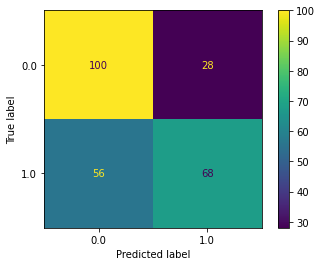

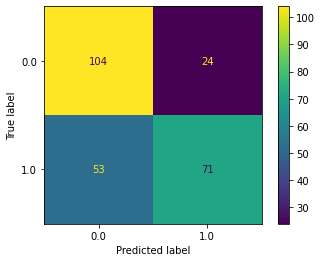

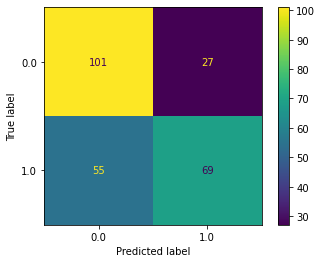

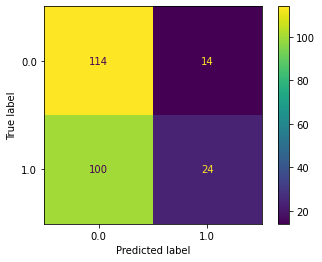

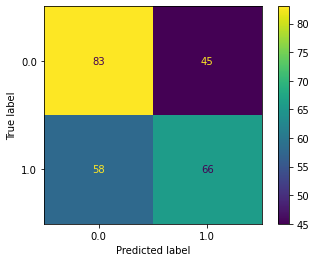

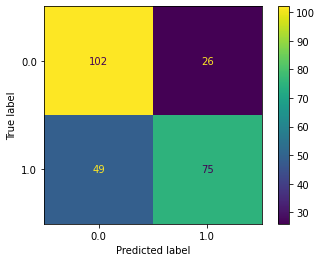

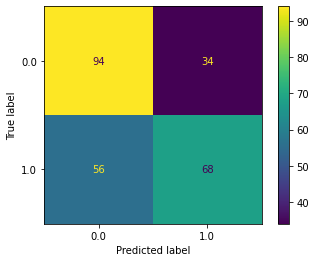

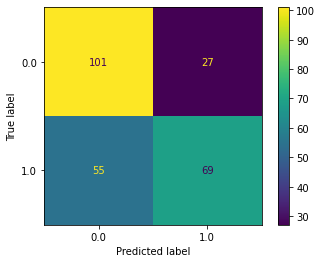

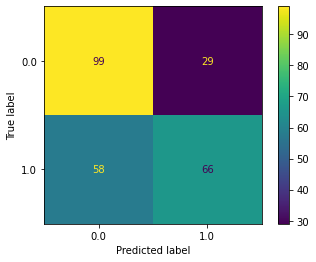

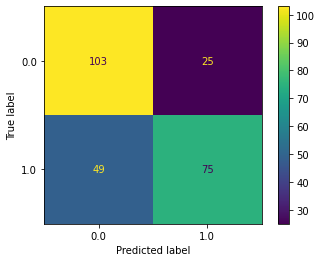

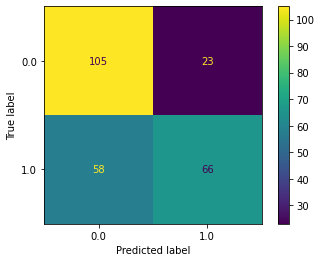

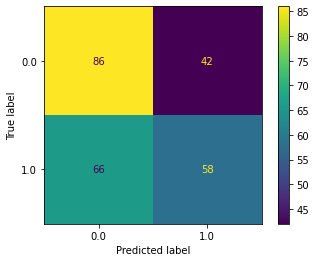

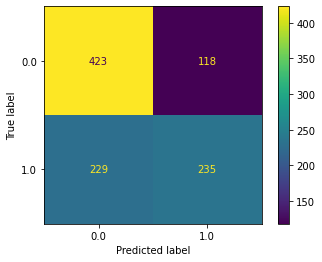

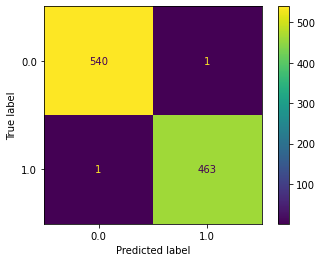

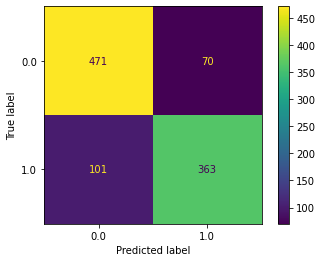

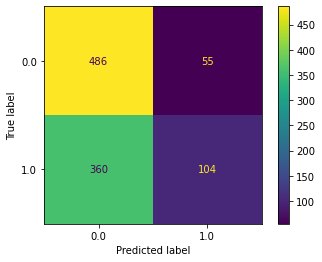

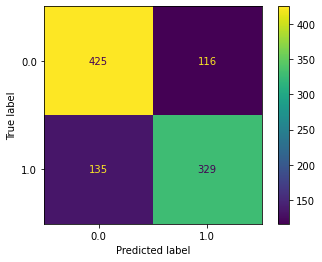

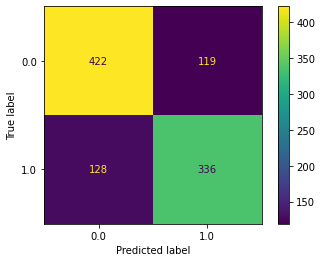

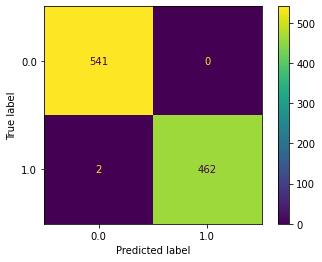

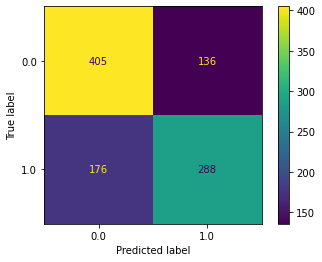

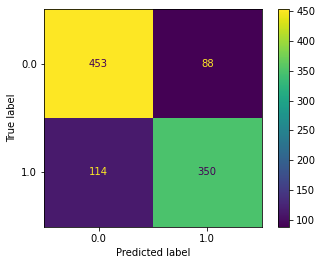

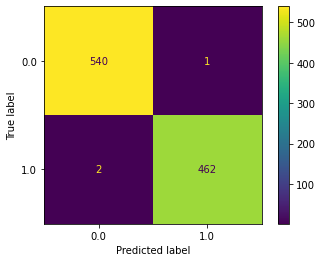

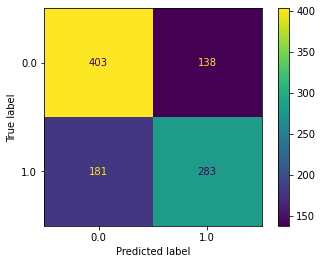

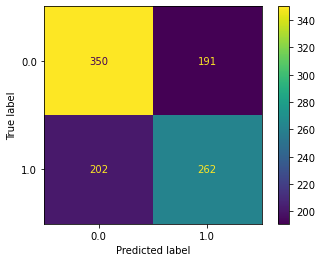

In [12]:

p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p4=plot_confusion_matrix(gnb, X_test, y_test)
p5=plot_confusion_matrix(KNN, X_test, y_test)
p6=plot_confusion_matrix(BC, X_test, y_test)
p7=plot_confusion_matrix(EC, X_test, y_test)
p8=plot_confusion_matrix(ADC, X_test, y_test)
p9=plot_confusion_matrix(GBC, X_test, y_test)
p10=plot_confusion_matrix(BCR, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)
p12=plot_confusion_matrix(mnb, X_test, y_test)

p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p16=plot_confusion_matrix(gnb, X_train, y_train)
p17=plot_confusion_matrix(KNN, X_train, y_train)
p18=plot_confusion_matrix(BC, X_train, y_train)
p19=plot_confusion_matrix(EC, X_train, y_train)
p20=plot_confusion_matrix(ADC, X_train, y_train)
p21=plot_confusion_matrix(GBC, X_train, y_train)
p22=plot_confusion_matrix(BCR, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)
p24=plot_confusion_matrix(mnb, X_train, y_train)

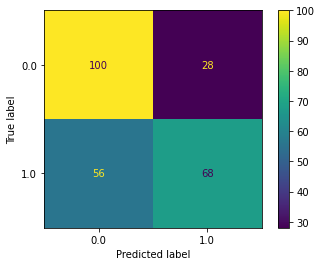

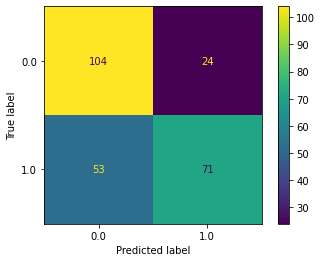

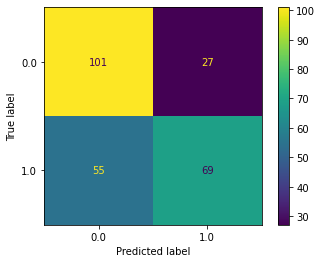

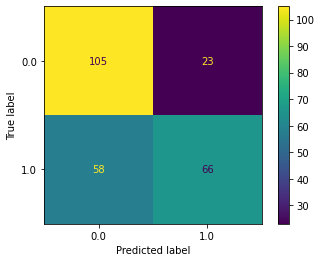

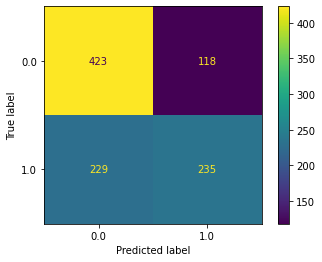

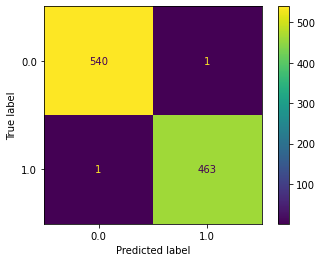

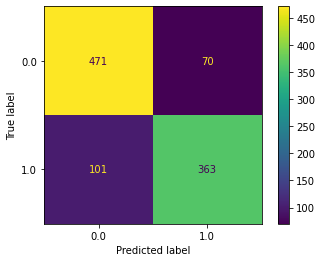

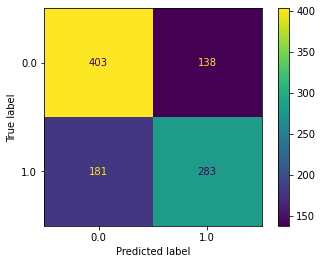

In [13]:
p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)

p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)

# Plotting Decision Tree

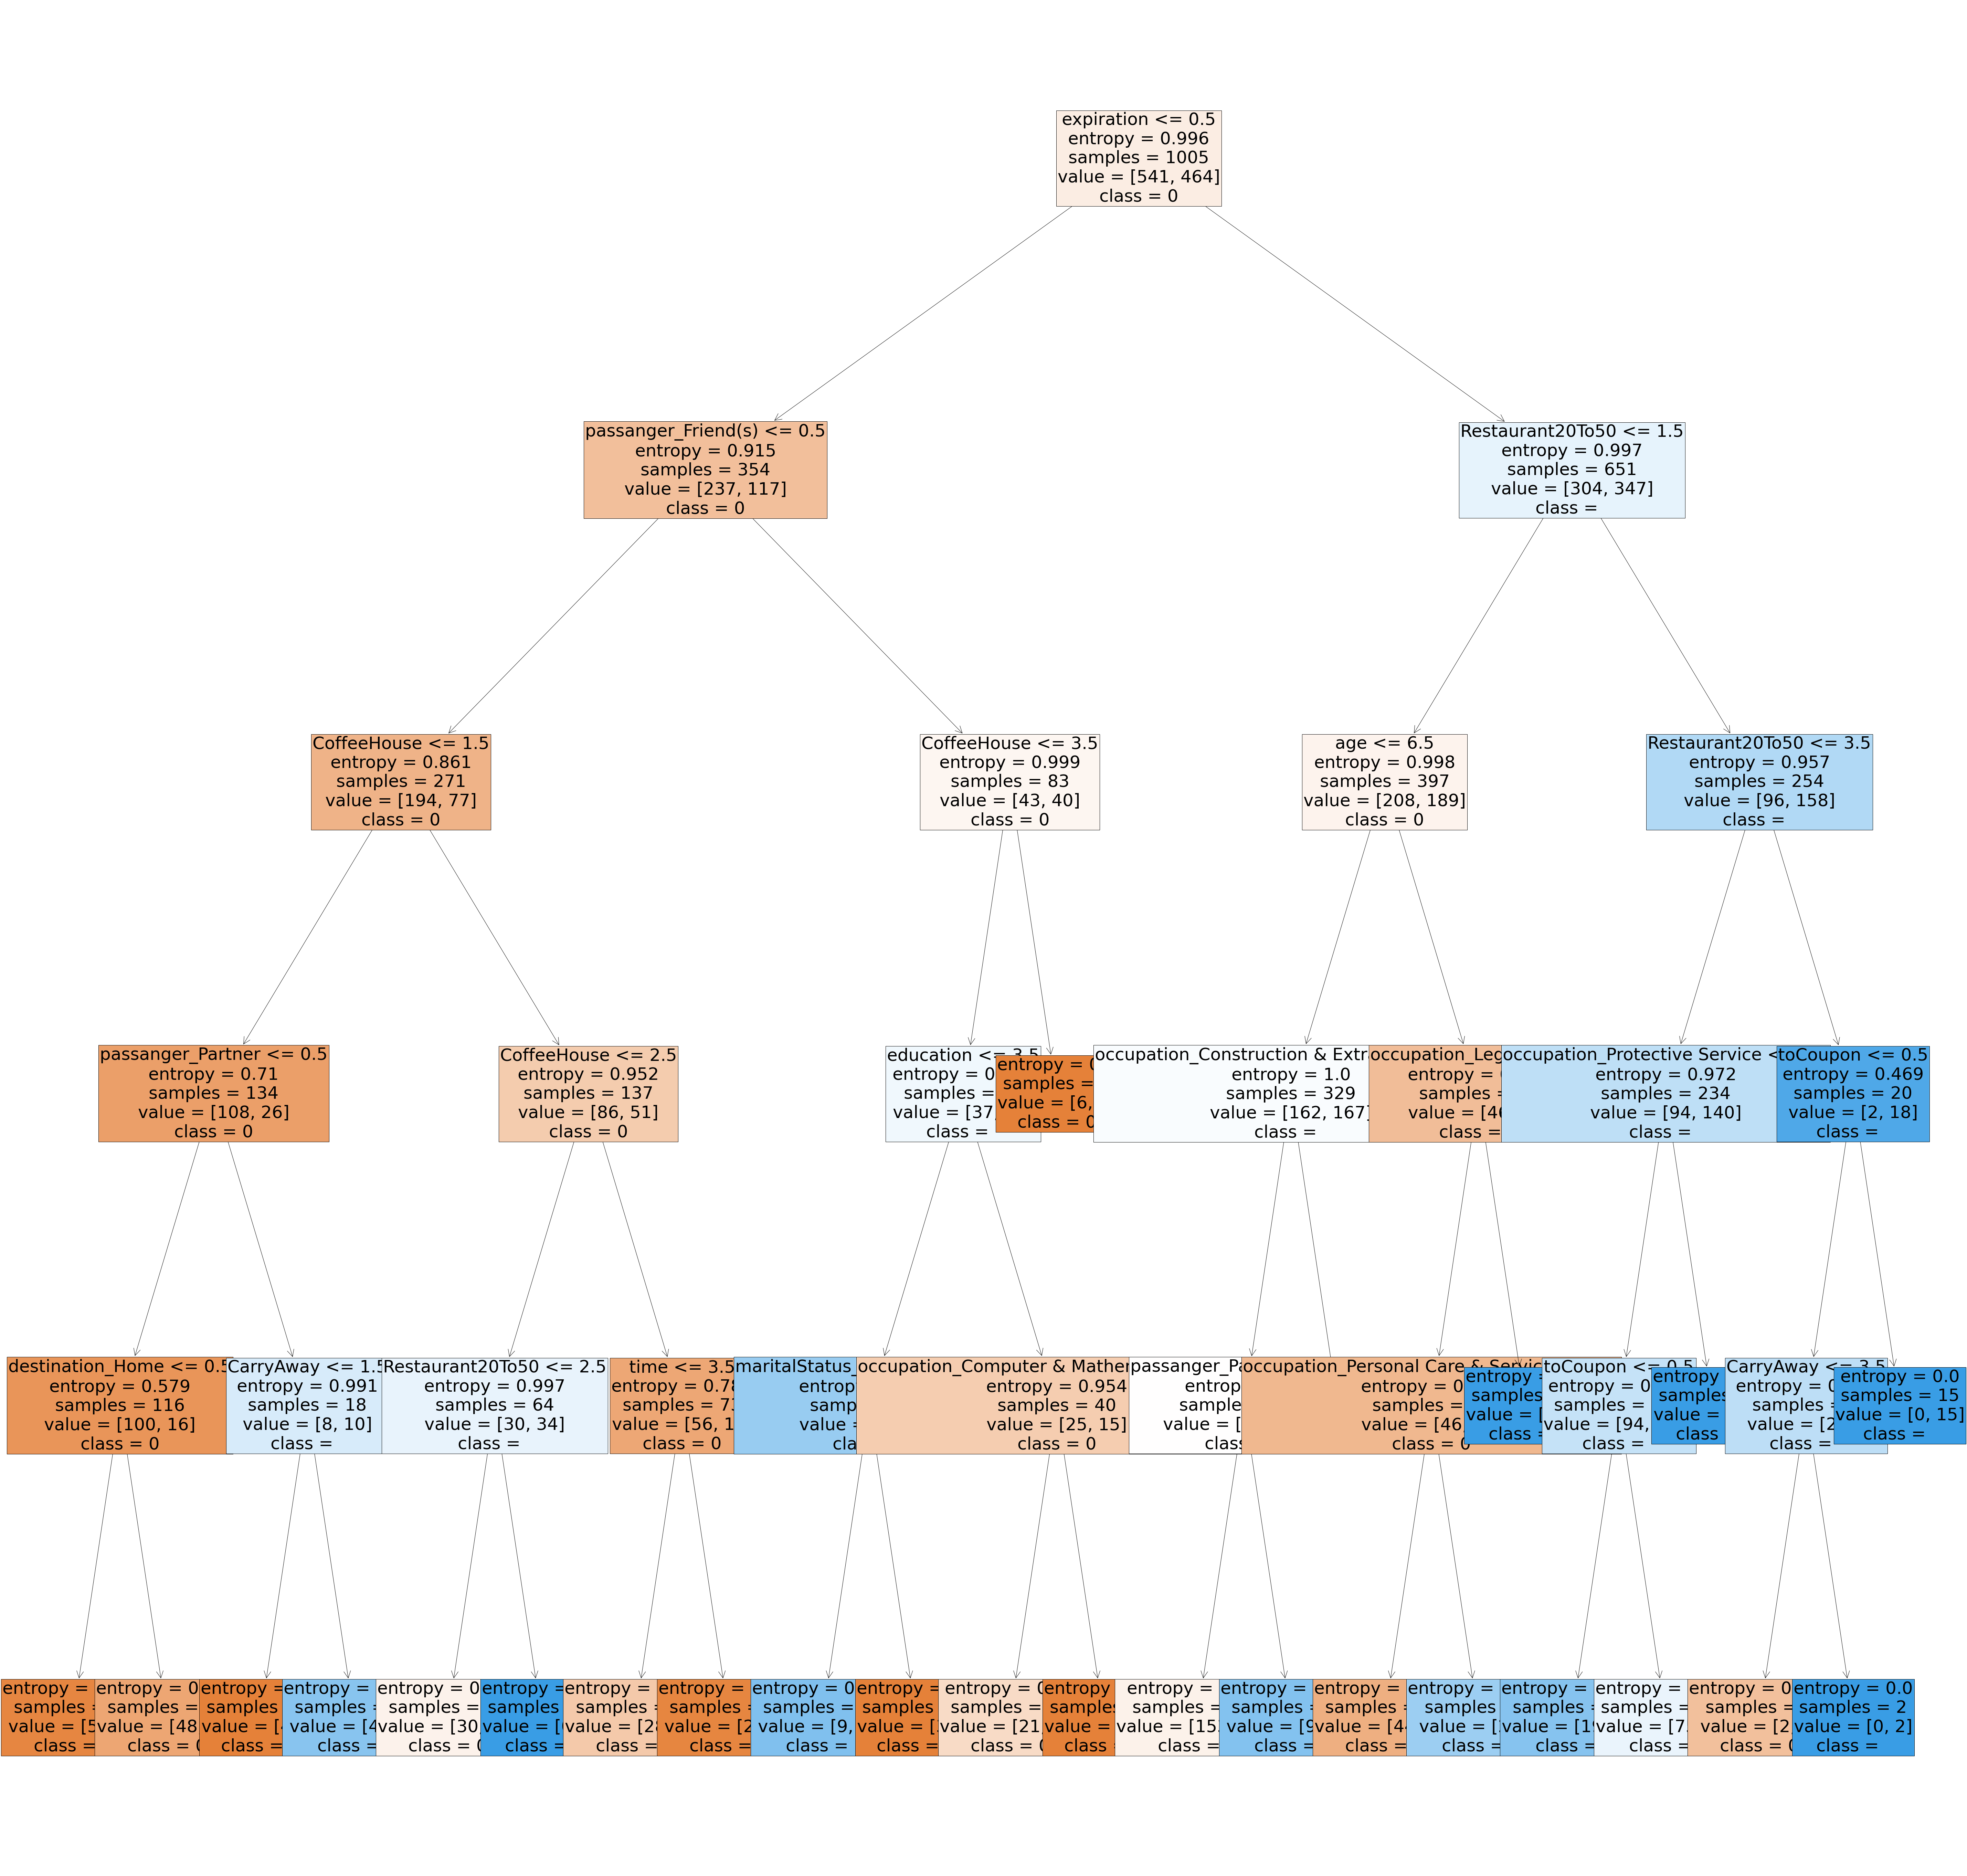

In [14]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(100,100))
fn=np.array(X1.columns)

cn=str(y1)
treee = tree.plot_tree(dt, fontsize=50,feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('dt_individualtree_R50_Wn.png')


# Validating the Training set Accuracy

In [15]:

dt_pred1 = dt.predict(X_train)
rf_pred1 = rf.predict(X_train)
sv_pred1 = sv.predict(X_train)
gnb_pred1 = gnb.predict(X_train)
KNN_pred1= KNN.predict(X_train)
BC_pred1 = BC.predict(X_train)
EC_pred1 = EC.predict(X_train)
ADC_pred1 = ADC.predict(X_train)
GBC_pred1 = GBC.predict(X_train)
LR_pred1 = LR.predict(X_train)
BCR_pred1 = BCR.predict(X_train)
mnb_pred1 = mnb.predict(X_train)

dt_acc1 = accuracy_score(y_train, dt_pred1)
rf_acc1 = accuracy_score(y_train, rf_pred1)
sv_acc1 = accuracy_score(y_train, sv_pred1)
gnb_acc1 = accuracy_score(y_train, gnb_pred1)
KNN_acc1 = accuracy_score(y_train, KNN_pred1)
BC_acc1 = accuracy_score(y_train, BC_pred1)
EC_acc1 = accuracy_score(y_train, EC_pred1)
ADC_acc1 = accuracy_score(y_train, ADC_pred1)
GBC_acc1 = accuracy_score(y_train, GBC_pred1)
LR_acc1 = accuracy_score(y_train, LR_pred1)
BCR_acc1 = accuracy_score(y_train, BCR_pred1)
mnb_acc1 = accuracy_score(y_train, mnb_pred1)

dt_auc1 = roc_auc_score(y_train, dt_pred1)
rf_auc1 = roc_auc_score(y_train, rf_pred1)
sv_auc1 = roc_auc_score(y_train, sv_pred1)
gnb_auc1 = roc_auc_score(y_train, gnb_pred1)
KNN_auc1 = roc_auc_score(y_train, KNN_pred1)
BC_auc1 = roc_auc_score(y_train, BC_pred1)
EC_auc1 = roc_auc_score(y_train, EC_pred1)
ADC_auc1 = roc_auc_score(y_train, ADC_pred1)
GBC_auc1 = roc_auc_score(y_train, GBC_pred1)
LR_auc1 = roc_auc_score(y_train, LR_pred1)
BCR_auc1 = roc_auc_score(y_train, BCR_pred1)
mnb_auc1 = roc_auc_score(y_train, mnb_pred1)

print('Decision tree acc: %.6f' % dt_acc1)
print('Random forest acc: %.6f' % rf_acc1)
print('SVM acc: %.6f' % sv_acc1)
print('Nabive Baise acc: %.6f' % gnb_acc1)
print('KNN: %.6f' % KNN_acc1)
print('BAGGING: %.6f' % BC_acc1)
print('Extra tree: %.6f' % EC_acc1)
print('ADC Boosting: %.6f' % ADC_acc1)
print('GDC Boosting: %.6f' % GBC_acc1)
print('Logistic: %.6f' % LR_acc1)
print('BAGGING Random Forest: %.6f' % BCR_acc1)
print('multinomial: %.6f' % mnb_acc1)
print()
print('Decision tree AUC: %.6f' % dt_auc1)
print('Random forest AUC: %.6f' % rf_auc1)
print('SVM AUC: %.6f' % sv_auc1)
print('gnb AUC: %.6f' % gnb_auc1)
print('KNN AUC: %.6f' % KNN_auc1)
print('Bagging AUC: %.6f' % BC_auc1)
print('Extra tree AUC: %.6f' % EC_auc1)
print('ADC Boosting: %.6f' % ADC_auc1)
print('GDC Boosting: %.6f' % GBC_auc1)
print('Logistic: %.6f' % LR_auc1)
print('BAGGING Random Forest: %.6f' % BCR_auc1)
print('multinomial: %.6f' % mnb_auc1)

Decision tree acc: 0.654726
Random forest acc: 0.998010
SVM acc: 0.829851
Nabive Baise acc: 0.587065
KNN: 0.750249
BAGGING: 0.754229
Extra tree: 0.998010
ADC Boosting: 0.689552
GDC Boosting: 0.799005
Logistic: 0.682587
BAGGING Random Forest: 0.997015
multinomial: 0.608955

Decision tree AUC: 0.644175
Random forest AUC: 0.997998
SVM AUC: 0.826469
gnb AUC: 0.561237
KNN AUC: 0.747317
Bagging AUC: 0.752087
Extra tree AUC: 0.997845
ADC Boosting: 0.684652
GDC Boosting: 0.795824
Logistic: 0.677415
BAGGING Random Forest: 0.996921
multinomial: 0.605803


In [16]:
print(dt)
print(rf)
print(sv)
print(gnb)
print(BC)
print(EC)
print(ADC)
print(GBC)
print(KNN)
print(LR)
print(BCR)
print(mnb)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       random_state=RandomState(MT19937) at 0x2DE0566EB40)
RandomForestClassifier(criterion='entropy',
                       random_state=RandomState(MT19937) at 0x2DE0566EB40)
SVC(C=15.0)
GaussianNB()
BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        random_state=RandomState(MT19937) at 0x2DE0566EB40),
                  n_estimators=100, random_state=7)
ExtraTreesClassifier(max_features=3)
AdaBoostClassifier(n_estimators=100, random_state=7)
GradientBoostingClassifier(random_state=7)
KNeighborsClassifier()
LogisticRegression(multi_class='multinomial', solver='newton-cg')
BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        random_state=RandomState(MT19937) at 0x2DE0566EB40),
         

# Voting

In [17]:
from sklearn.ensemble import VotingClassifier

In [18]:
Estimators = []
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
Estimators.append(('Decision_Tree', dt))

rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
Estimators.append(('Random_Forest', rf))

sv = SVC(kernel='rbf', C=15.0)
Estimators.append(('SVM', sv))

LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')
Estimators.append(('Logistic', LR))



In [19]:
# create the ensemble model
ensemble = VotingClassifier(Estimators)
results = cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.6269523809523809


# Explorative data analysis

In [20]:
from matplotlib import pyplot

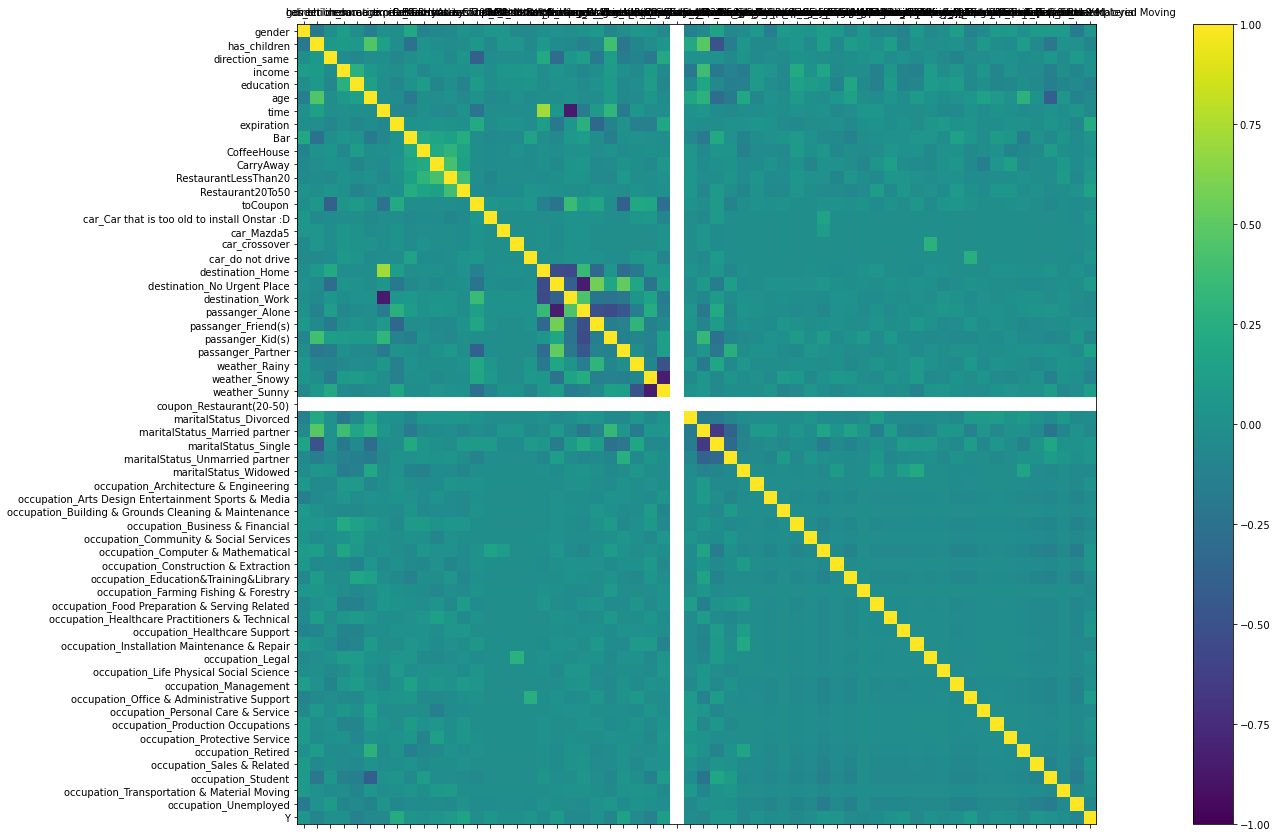

In [22]:
correlations = df.corr(method='pearson')
# plot correlation matrix
fig = pyplot.figure(figsize =(200,50))
ax = fig.add_subplot(353)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names=df1.head()
ticks = np.arange(0,60,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
x2=pyplot.show()

In [23]:
from pandas.plotting import scatter_matrix

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:89: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:90: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


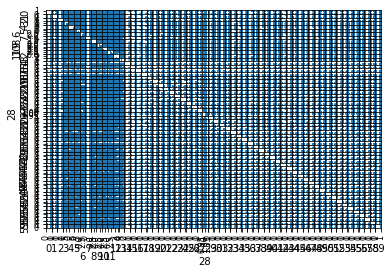

In [24]:
scatter_matrix(df)

pyplot.show()

In [25]:
peek = df.head(20)
print(peek)

     0    1    2    3    4    5    6    7    8    9   ...   50   51   52   53  \
0   0.0  1.0  0.0  3.0  2.0  1.0  3.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0.0  1.0  0.0  3.0  2.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2   1.0  0.0  0.0  5.0  4.0  1.0  3.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
3   1.0  0.0  0.0  5.0  4.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
4   1.0  1.0  0.0  6.0  4.0  6.0  3.0  1.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
5   1.0  1.0  0.0  6.0  4.0  6.0  0.0  1.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
6   1.0  0.0  0.0  1.0  3.0  1.0  3.0  1.0  2.0  1.0  ...  0.0  0.0  0.0  0.0   
7   1.0  0.0  0.0  1.0  3.0  1.0  0.0  1.0  2.0  1.0  ...  0.0  0.0  0.0  0.0   
8   1.0  0.0  0.0  4.0  4.0  2.0  3.0  1.0  2.0  4.0  ...  0.0  0.0  0.0  0.0   
9   1.0  0.0  0.0  4.0  4.0  2.0  0.0  1.0  2.0  4.0  ...  0.0  0.0  0.0  0.0   
10  1.0  0.0  0.0  3.0  2.0  2.0  3.0  1.0  4.0  4.0  ...  0.0  0.0  0.0  0.0   
11  1.0  0.0  0.0  3.0  2.0 

In [26]:
shape = df.shape
print(shape)

(1257, 60)


In [27]:
type = df.dtypes
print(type)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
dtype: object


In [28]:
from pandas import set_option

In [29]:
set_option('display.width', 200)
set_option('display.max_columns', 10)
set_option('precision', 3)

description = df.describe()
print(description)

             0         1         2         3         4   ...        55        56        57        58        59
count  1257.000  1257.000  1257.000  1257.000  1257.000  ...  1257.000  1257.000  1257.000  1257.000  1257.000
mean      0.497     0.441     0.180     3.985     3.177  ...     0.074     0.113     0.016     0.152     0.468
std       0.500     0.497     0.384     2.568     1.235  ...     0.262     0.317     0.125     0.359     0.499
min       0.000     0.000     0.000     0.000     0.000  ...     0.000     0.000     0.000     0.000     0.000
25%       0.000     0.000     0.000     2.000     2.000  ...     0.000     0.000     0.000     0.000     0.000
50%       0.000     0.000     0.000     4.000     4.000  ...     0.000     0.000     0.000     0.000     0.000
75%       1.000     1.000     0.000     6.000     4.000  ...     0.000     0.000     0.000     0.000     1.000
max       1.000     1.000     1.000     8.000     5.000  ...     1.000     1.000     1.000     1.000     1.000



In [30]:
class_counts = df1.groupby('Y').size()
print(class_counts)


Y
0    669
1    588
dtype: int64


In [31]:
correlations = df.corr(method='pearson')
print(correlations)

           0      1          2      3      4   ...         55     56         57         58     59
0   1.000e+00 -0.191 -5.679e-03  0.097 -0.013  ...  8.972e-02  0.072  7.700e-02 -1.727e-01  0.047
1  -1.906e-01  1.000  6.424e-02  0.091  0.064  ... -6.115e-02 -0.210  1.518e-02  8.125e-03 -0.081
2  -5.679e-03  0.064  1.000e+00 -0.024 -0.072  ... -5.705e-03  0.049 -2.642e-02  8.460e-02  0.001
3   9.696e-02  0.091 -2.387e-02  1.000  0.271  ... -3.267e-02 -0.130 -1.163e-02 -7.865e-02  0.005
4  -1.338e-02  0.064 -7.199e-02  0.271  1.000  ... -5.273e-02 -0.134 -8.512e-02 -4.798e-02 -0.111
5  -1.371e-01  0.457 -1.260e-02  0.069  0.134  ...  2.287e-02 -0.399  4.434e-02 -9.859e-02 -0.047
6   6.524e-03  0.138 -7.767e-03  0.004 -0.006  ... -2.063e-02  0.014 -1.906e-02  3.487e-02 -0.056
7  -5.786e-03 -0.020 -7.361e-02 -0.011 -0.076  ... -6.841e-03  0.038  1.068e-03 -6.665e-02  0.227
8   1.937e-01 -0.248 -1.551e-02  0.044  0.028  ...  2.667e-02 -0.047  3.245e-02 -3.788e-02  0.035
9  -1.000e-01  0.031

In [32]:
skew = df.skew()
print(skew)

0      0.011
1      0.239
2      1.670
3      0.203
4     -0.174
5      0.403
6     -0.261
7     -0.611
8      0.783
9      0.314
10    -0.020
11     0.169
12     1.399
13     0.238
14    17.663
15    25.040
16    25.040
17    17.663
18     0.239
19     1.012
20     0.955
21    -0.731
22     2.461
23     2.305
24     2.788
25     4.513
26     2.317
27    -1.810
28     0.000
29     4.562
30     0.265
31     0.568
32     2.003
33     8.434
34    10.100
35     4.466
36    13.304
37     3.982
38     7.368
39     2.375
40     7.551
41     3.131
42    20.421
43     5.838
44     6.246
45     6.033
46     8.186
47     6.886
48     9.692
49     3.880
50     4.248
51     8.186
52     9.692
53     7.551
54     5.131
55     3.259
56     2.448
57     7.747
58     1.941
59     0.129
dtype: float64


In [33]:
skew.to_csv('Skew2_R50_Wn.csv', index=False)

In [34]:
correlations.to_csv('correlations2_R50_Wn.csv', index=False)

In [35]:
description.to_csv('description_R50_Wn.csv', index=False)

# Random Forest Tree

In [36]:
from sklearn.tree import export_graphviz

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

<Figure size 14400x11520 with 0 Axes>

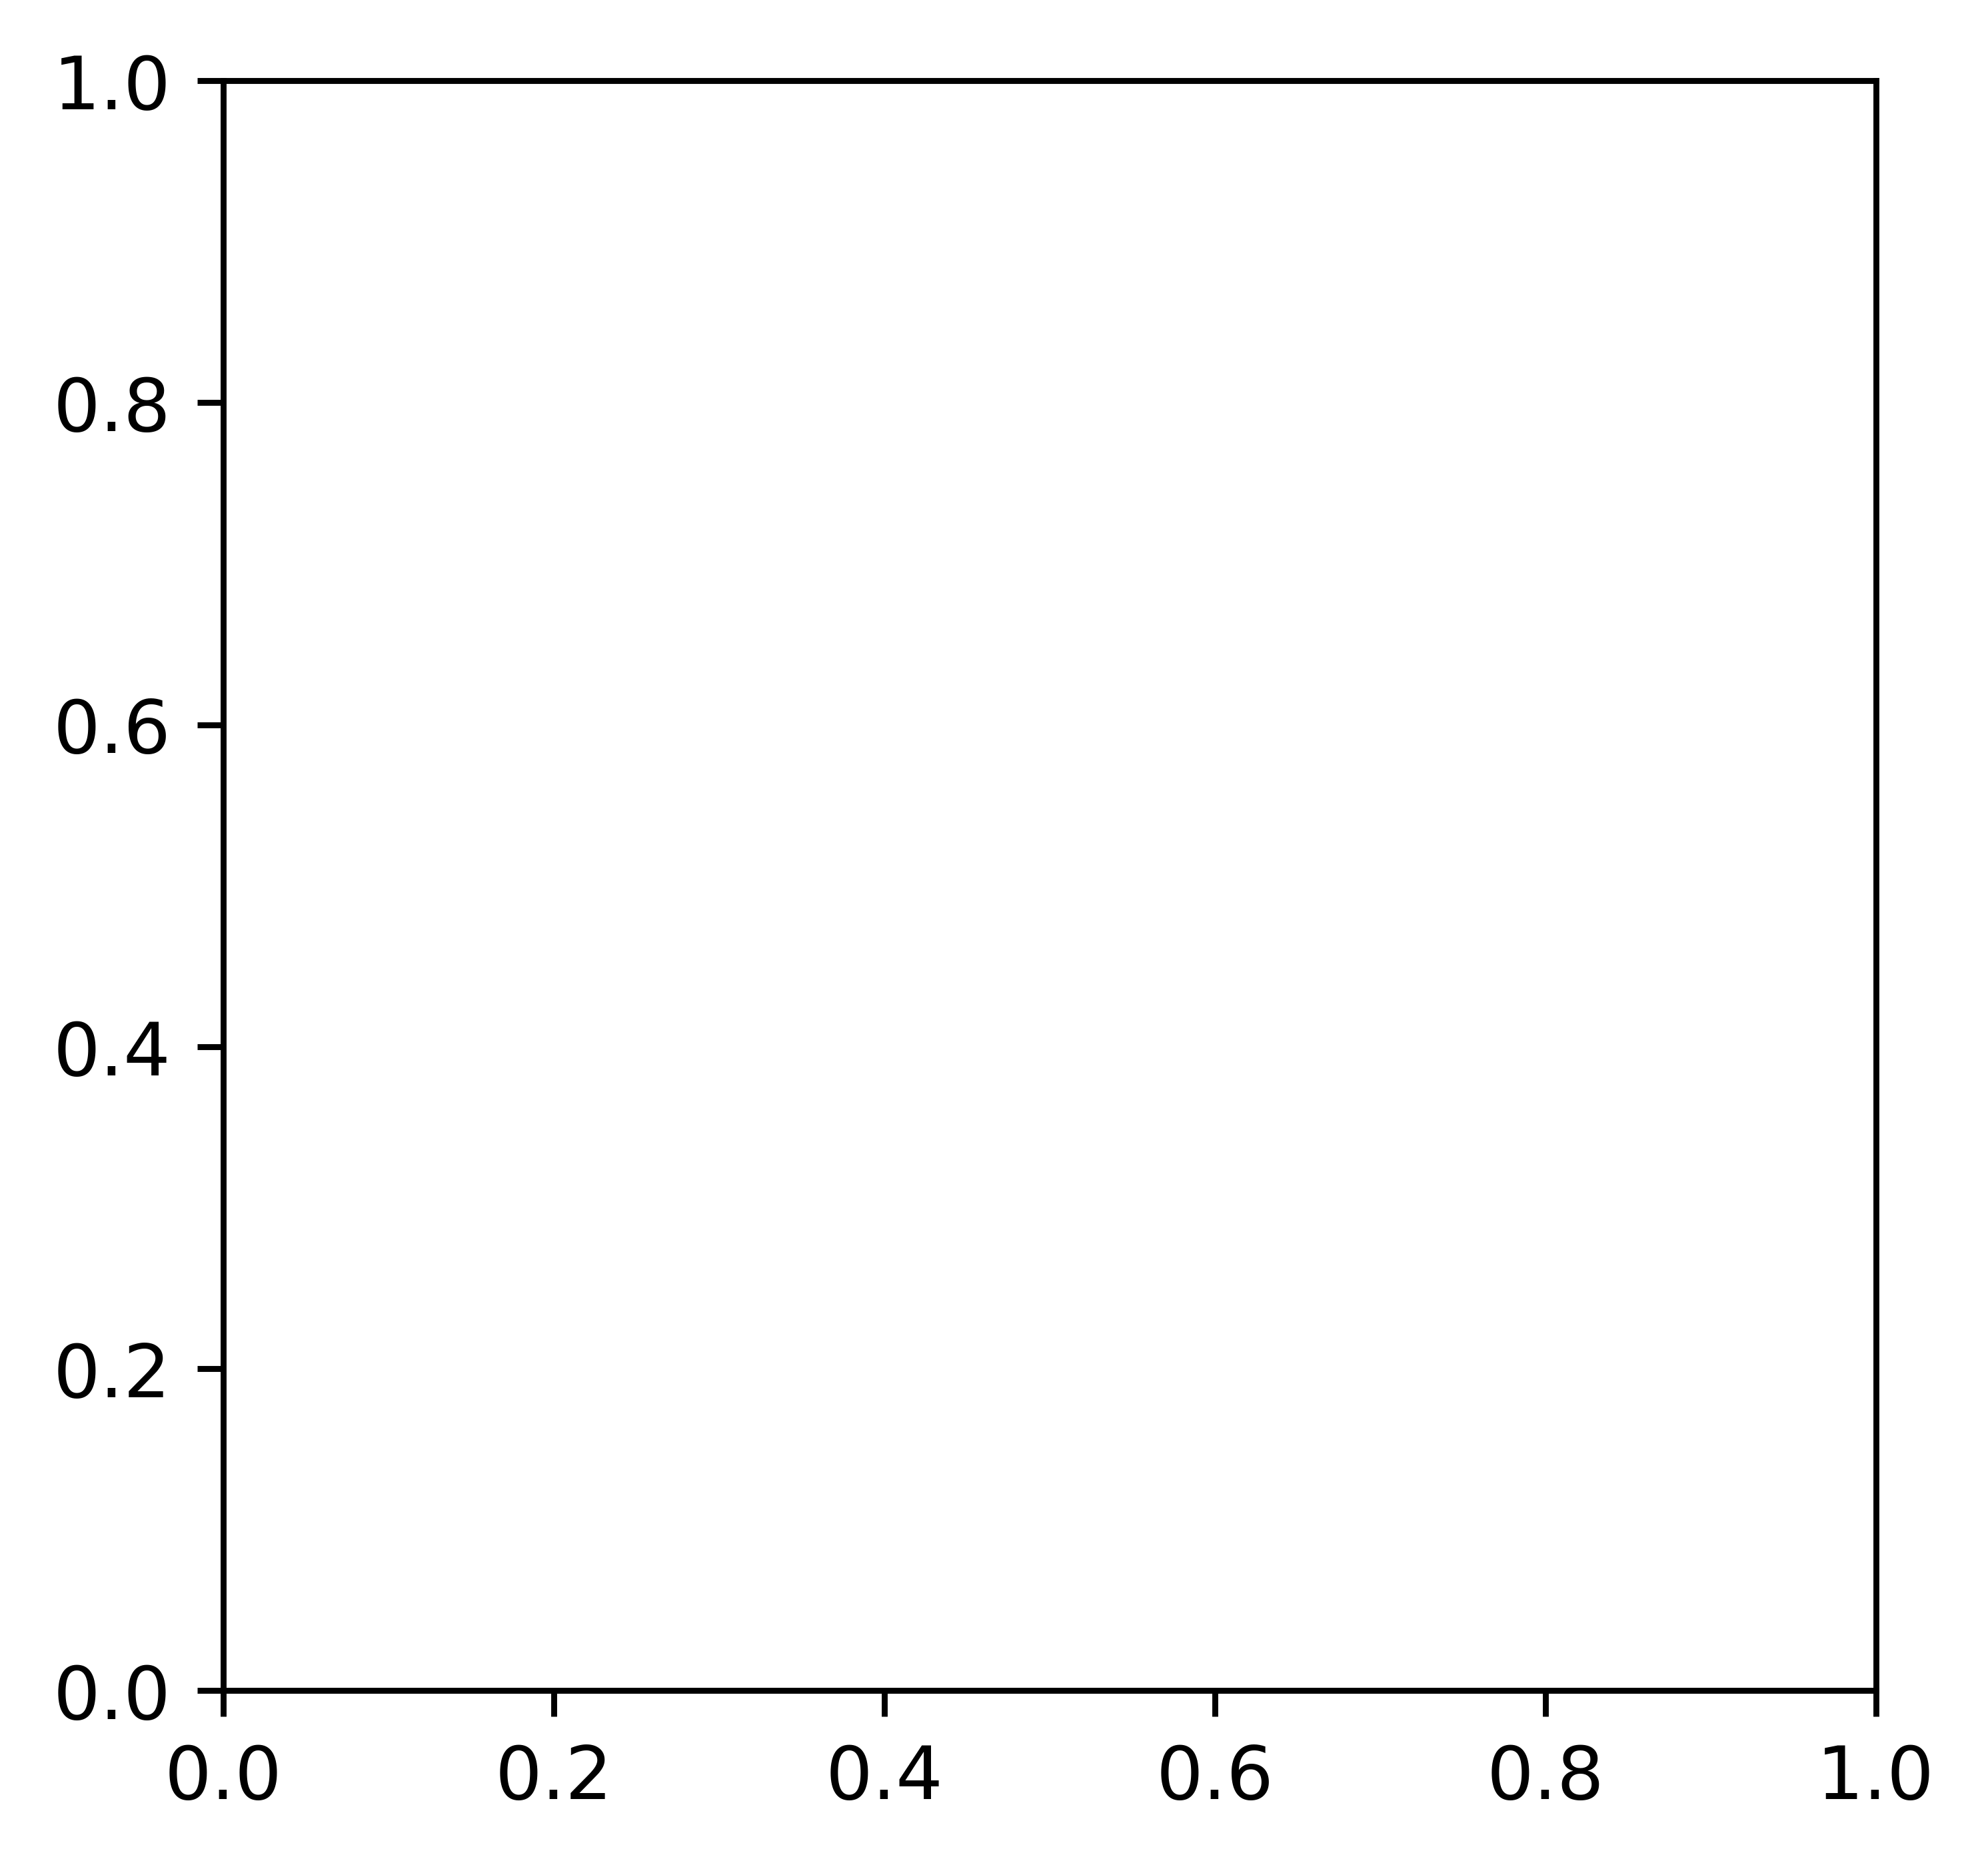

In [37]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(200,160))
fn=np.array(X1.columns)
cn=str(y1)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree_R50_Wn.png')